In [107]:
# libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [108]:
# Caminho dos Arquivos
path = 'dataset/'

# Carreguei todos os aquivos um um dicionario de df
arquivos = [a for a in os.listdir(path) if a.endswith('.csv')]
dataframes = {arq.replace('.csv', ''): pd.read_csv(os.path.join(path, arq)) for arq in arquivos}

### O que fiz acima foi:
 1. Definir uma variável com o caminho para os arquivos csvs
 2. Criei a variável arquivos onde utilizei list comprehension para armazenar todos os arquivos do caminho path que são cvs, caso eu armazene algum arquivo extra na pasta dos datasets que não seja csv, não sera armazenado nessa variável.
 3. Criei um dicionário de dataframes, onde a chave é o nome da tabela e o valor é o próprio dataframe. Exemplo de acesso em um dos df abaixo.

In [109]:
# Visualizando os df
dataframes['olist_customers_dataset']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Limpeza dos dados:

In [110]:
# Verificando nulos
for tabela, df in dataframes.items():
    print(f"Nulos na tabela: {tabela}")
    print(df.isnull().sum())
    print("---------------" * 10)


Nulos na tabela: olist_order_payments_dataset
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Nulos na tabela: olist_order_items_dataset
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Nulos na tabela: olist_orders_dataset
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delive

## Temos nulos em 3 tabelas:
1. olist_orders_dataset
2. olist_products_dataset
3. olist_order_reviews_dataset

Vou explorar cada tabela individualmente para identificar o que cada nulo quer dizer

# Olist_orders_dataset

In [111]:
dataframes['olist_orders_dataset']['order_approved_at']

0        2017-10-02 11:07:15
1        2018-07-26 03:24:27
2        2018-08-08 08:55:23
3        2017-11-18 19:45:59
4        2018-02-13 22:20:29
                ...         
99436    2017-03-09 09:54:05
99437    2018-02-06 13:10:37
99438    2017-08-27 15:04:16
99439    2018-01-08 21:36:21
99440    2018-03-09 11:20:28
Name: order_approved_at, Length: 99441, dtype: object

In [112]:
dataframes['olist_orders_dataset']['order_delivered_carrier_date']

0        2017-10-04 19:55:00
1        2018-07-26 14:31:00
2        2018-08-08 13:50:00
3        2017-11-22 13:39:59
4        2018-02-14 19:46:34
                ...         
99436    2017-03-10 11:18:03
99437    2018-02-07 23:22:42
99438    2017-08-28 20:52:26
99439    2018-01-12 15:35:03
99440    2018-03-09 22:11:59
Name: order_delivered_carrier_date, Length: 99441, dtype: object

In [113]:
dataframes['olist_orders_dataset']['order_delivered_customer_date']

0        2017-10-10 21:25:13
1        2018-08-07 15:27:45
2        2018-08-17 18:06:29
3        2017-12-02 00:28:42
4        2018-02-16 18:17:02
                ...         
99436    2017-03-17 15:08:01
99437    2018-02-28 17:37:56
99438    2017-09-21 11:24:17
99439    2018-01-25 23:32:54
99440    2018-03-16 13:08:30
Name: order_delivered_customer_date, Length: 99441, dtype: object

## Cada coluna armazena a data e hora respectiva ao seu nome
1. order_approved_at - Data e Hora que o pedido foi aprovado, se está nulos, temos pedidos que não foram aprovados ou que tiveram algum tipo de erro em sua aprovação
2. order_delivered_carrier_date: Data e Hora que o pedido foi enviado, se temos nulos pode-se dizer que o pedido não foi enviado ou que teve problemas de envio
3. order_delivered_customer_date: Data e hora que o pedido foi entregue, se não temos pode-se dizer que o pedido não chegou ao cliente.

Vale ressaltar que as colunas estao em formato object, transformarei as colunas em datetime em todas as tabelas necessárias enquanto faço o tratamento de nulos.

Na primeira coluna, temos apenas 160 dados nulos, como temos um dataset de 100000 dados, 160 dados acaba não sendo tão relevante para nossa análise, dessa forma irei excluir os nulos da tabela order_approved_at

Ja nas 2 tabelas seguintes, temos 1700 e 3000 dados. Ou seja, cerca de 1,7%-3% do dataset completo, tendo em vista que também podemos utilizar esses dados depois para verificar entregas e análises das mesmas farei duas colunas novas sendo elas
1. "enviados", com valores 1 para pedidos enviados, 0 para pedidos nao enviado(nulos).
2. "entregues": com valores 1 para os pedidos entregues e 0 para os valores nao entregues(nulos). 

E manterei os nulos nas colunas originais.

(Estou escrevendo esse parênteses após ter feito a parte 3 do case. Esses Nulos que eu deixei vão ser impactantes nos modelos que eu tive que fazer naquela parte, como eu ja tinha iniciado o case deixando eles não nulos nesse momento, só vou exclui-los quando estiver na parte 3 do case.)

In [114]:
# Excluir dados da tabela order_approved_at
dataframes['olist_orders_dataset'] = dataframes['olist_orders_dataset'].dropna(subset=['order_approved_at'])

dataframes['olist_orders_dataset']['order_approved_at'].isnull().sum()

np.int64(0)

In [115]:
# Object para datetime
dataframes['olist_orders_dataset']['order_approved_at'] = pd.to_datetime(dataframes['olist_orders_dataset']['order_approved_at'], errors='coerce')
dataframes['olist_orders_dataset']['order_delivered_carrier_date'] = pd.to_datetime(dataframes['olist_orders_dataset']['order_delivered_carrier_date'], errors='coerce')
dataframes['olist_orders_dataset']['order_delivered_customer_date'] = pd.to_datetime(dataframes['olist_orders_dataset']['order_delivered_customer_date'], errors='coerce')

In [116]:
# Criacao de novas colunas
dataframes['olist_orders_dataset']['enviados'] = dataframes['olist_orders_dataset']['order_delivered_carrier_date'].notna().astype(int)
dataframes['olist_orders_dataset']['entregues'] = dataframes['olist_orders_dataset']['order_delivered_customer_date'].notna().astype(int)

In [117]:
dataframes['olist_orders_dataset']['entregues'].value_counts()

entregues
1    96462
0     2819
Name: count, dtype: int64

In [118]:
dataframes['olist_orders_dataset']['enviados'].value_counts()

enviados
1    97644
0     1637
Name: count, dtype: int64

# olist_products_dataset

1. product_category_name         610
2. product_name_lenght           610
3. product_description_lenght    610
4. product_photos_qty            610
5. product_weight_g                2
6. product_length_cm               2
7. product_height_cm               2
8. product_width_cm                2

Temos valores muito pequenos para influenciar na análise, e por apresentarem o mesmo valor, provavelmente são referente há um mesmo tipo de produto, tendo isso em vista excluirei, todos os dados nulos dessa tabela:

In [119]:
dataframes['olist_products_dataset'] = dataframes['olist_products_dataset'].dropna(
    subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])


In [120]:
dataframes['olist_products_dataset'].isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [121]:
dataframes['olist_products_dataset'].dropna(inplace=True)


In [122]:
dataframes['olist_products_dataset'].isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [123]:
dataframes['olist_products_dataset']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


# olist_order_reviews_dataset

- Nulos na tabela: olist_order_reviews_dataset
- review_id                      0
- order_id                       0
- review_score                   0
- review_comment_title       87656
- review_comment_message     58247
- review_creation_date           0
- review_answer_timestamp        0
- dtype: int64

Como podemos observar no dataset abaixo, os nulos são referentes as reviews dos clientes, que são bem comuns de não serem preenchidas, dado esse cenário optarei por manter os nulos

In [124]:
dataframes['olist_order_reviews_dataset']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


# Vamos observar abaixo a quantidade de duplicatas nas tabelas do dicionario de df

In [125]:
# Verificando duplicatas
for tabela, df in dataframes.items():
    print(f"Duplicatas na tabela: {tabela}")
    print(df.duplicated().sum())
    print("---------------" * 10)


Duplicatas na tabela: olist_order_payments_dataset
0
------------------------------------------------------------------------------------------------------------------------------------------------------
Duplicatas na tabela: olist_order_items_dataset
0
------------------------------------------------------------------------------------------------------------------------------------------------------
Duplicatas na tabela: olist_orders_dataset
0
------------------------------------------------------------------------------------------------------------------------------------------------------
Duplicatas na tabela: product_category_name_translation
0
------------------------------------------------------------------------------------------------------------------------------------------------------
Duplicatas na tabela: olist_products_dataset
0
-----------------------------------------------------------------------------------------------------------------------------------------------

In [126]:
dataframes['olist_geolocation_dataset']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [127]:
dataframes['olist_geolocation_dataset'][dataframes['olist_geolocation_dataset'].duplicated(keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [128]:
# Ordenarei as duplicatas para ficarem juntas
geoloc = dataframes['olist_geolocation_dataset'].sort_values(by=dataframes['olist_geolocation_dataset'].columns.tolist())

# Mostrar apenas duplicatas ordenadas
geoloc[geoloc.duplicated(keep=False)]


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
519,1001,-23.551337,-46.634027,sao paulo,SP
583,1001,-23.551337,-46.634027,sao paulo,SP
818,1001,-23.551337,-46.634027,sao paulo,SP
206,1001,-23.550498,-46.634338,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
...,...,...,...,...,...
999899,99980,-28.387432,-51.847727,david canabarro,RS
999958,99980,-28.387059,-51.848964,david canabarro,RS
1000129,99980,-28.387059,-51.848964,david canabarro,RS
999775,99980,-28.386689,-51.847091,david canabarro,RS


## Temos exatos dados duplicatos na tabela.
É normal termos o mesmo cep no nosso dataset, afinal mais de uma pessoa pode morar no mesmo endereço em casas diferentes, que resultariam diretamente no mesmo cep, que na nossa tabela esta definida como zip code, porém como os dados de geolocalização são identicos temos que estão indexados na mesma casa, e por isso irei remover tais dados para limpar os dados idênticos.

In [129]:
# Excluindo duplicatas
dataframes['olist_geolocation_dataset'] = dataframes['olist_geolocation_dataset'].drop_duplicates()

In [130]:
# agora temos os dados limpos de duplicatas.
dataframes['olist_geolocation_dataset'].duplicated().sum()

np.int64(0)

# Farei a normalização das colunas
Para fazer isso irei utilizar o modulo info no dataset para conseguir visualizar os tipos de colunas em que podem ou devem ser alteradas



In [131]:
for tabela, df in dataframes.items():
    print(f'Nome da tabela: {tabela}')
    print(df.info())
    print('-----' * 10)

Nome da tabela: olist_order_payments_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
--------------------------------------------------
Nome da tabela: olist_order_items_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   pr

In [132]:
# Os tipos dos dados nas tabelas estão normalizados
dataframes['olist_order_payments_dataset'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [133]:
dataframes['olist_order_items_dataset'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [134]:
# temos a coluna shipping_limit_date como object, transformarei a mesma em datetime
dataframes['olist_order_items_dataset']['shipping_limit_date'] = pd.to_datetime(dataframes['olist_order_items_dataset']['shipping_limit_date'], errors='coerce')


In [135]:
# Faltam 2 colunas serem mudadas para datetime, order_purchase_timestamp e order_estimated_delivery_date
dataframes['olist_orders_dataset'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,enviados,entregues
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,1


In [136]:
# Transformando as colunas object em datetime
dataframes['olist_orders_dataset']['order_purchase_timestamp'] = pd.to_datetime(dataframes['olist_orders_dataset']['order_purchase_timestamp'], errors='coerce')
dataframes['olist_orders_dataset']['order_estimated_delivery_date'] = pd.to_datetime(dataframes['olist_orders_dataset']['order_estimated_delivery_date'], errors='coerce')

In [137]:
# Os dados estão normalizados na tabela
dataframes['product_category_name_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [138]:
# Os dados estão normalizados
dataframes['olist_products_dataset'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [139]:
# Os dados estão normalizados
dataframes['olist_sellers_dataset'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [140]:
# Temos as 2 colunas de data no formato object que irei transforma em datetime
dataframes['olist_order_reviews_dataset'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [141]:
# Tranformando em datetime
dataframes['olist_order_reviews_dataset']['review_creation_date'] = pd.to_datetime(dataframes['olist_order_reviews_dataset']['review_creation_date'], errors='coerce')
dataframes['olist_order_reviews_dataset']['review_answer_timestamp'] = pd.to_datetime(dataframes['olist_order_reviews_dataset']['review_answer_timestamp'], errors='coerce')

In [142]:
# Os dados estão normalizados
dataframes['olist_geolocation_dataset'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [143]:
# Os dados estão normalizados
dataframes['olist_customers_dataset'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [144]:
# Rodarei novamente o loop, para ficar visivel que todas as mudanças foram feitas
for tabela, df in dataframes.items():
    print(f'Nome da tabela: {tabela}')
    print(df.info())
    print('-----' * 10)

Nome da tabela: olist_order_payments_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
--------------------------------------------------
Nome da tabela: olist_order_items_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-

# Fazer um modelo relacional e conectar as tabelas adequadamente
Utilizei o site: https://dbdiagram.io/d/DER-OLIST-6826388f5b2fc4582fcf952a para fazer o der desse banco de dados. O arquivo esta anexado na pasta para visualização

Como o foco principal é fazer análises e não construir um banco de dados mais robusto, irei manter o banco de dados sem relacionamento direto, pois conseguirei fazer joins e manipular as tabelas no sql diretamente.

In [145]:
import sqlite3

con = sqlite3.connect("olist_dataset.db")

for nome_tabela, df in dataframes.items():
    df.to_sql(nome_tabela, con, if_exists='replace', index=False)

#### Acima importei o sqlite3 e fiz a conexão com um arquivo local .db, que não existe até o comando ser executado

Em seguida utilizo das propriedades do dicionario de chave e valor, para transformar o valor(df) em tabela e linkar o nome da tabela(chave), ao nome da tabela do banco de dados.

# Tipos de Análise que poderão ser feitas:

1. Utilizarei o ipython-sql para consultas diretas no banco de dados com "SQL Puro" .
2. Utilizarei o pandas para fazer consultas no banco de dados em conjunto com SQL.

Exemplos abaixo:

#### 1. ipython-sql

In [146]:
#Carrego a extensao sql primeiro e em seguia faço a conexão com o banco de dados
%load_ext sql 
%sql sqlite:///olist_dataset.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Abaixo irei fazer uma consulta com SQL

In [147]:
%%sql
SELECT * FROM olist_customers_dataset LIMIT 5

 * sqlite:///olist_dataset.db
Done.


customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### 2. Pandas com SQL


In [148]:
pd.read_sql("Select * From olist_customers_dataset;", con).head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Descrever os Passos de preparação dos dados adotados


### Importação de arquivos:
Fiz a importação dos 9 arquivos necessários em 3 passos.  
1 - Defini a variável `path` que continha o diretório dos arquivos CSVs.  
2 - Utilizei list comprehension para armazenar o nome de todos os arquivos CSV do caminho indexado na lista `arquivos`.  
3 - Criei um dicionário de DataFrames, onde a chave seria o nome do df, e o valor seria o df por si só, com linhas e colunas.

### Limpeza dos dados:

#### Nulos:
Primeiramente, fiz a verificação de nulos no dataset e notei que havia dados nulos em 3 tabelas:

- `olist_orders_dataset`  
- `olist_products_dataset`  
- `olist_order_reviews_dataset`

**olist_orders_dataset**  
Optei por excluir os dados nulos da tabela, que só continha 160 registros, pois não eram significativos a ponto de mudar nossa análise, dado que temos um conjunto com 100 mil dados.  
Enquanto nas tabelas seguintes, optei por deixar os nulos e criar uma tabela nova para cada, onde criei valores booleanos de 0 e 1 para identificar quando os produtos foram ou não enviados/entregues.

**olist_products_dataset**  
Identifiquei pouquíssimos dados nulos nessa tabela, que não influenciavam na análise posterior. Por isso, com base em meu conhecimento, optei por excluir todos os dados nulos.

**olist_order_reviews_dataset**  
Os dados nulos nessa tabela eram referentes aos comentários de avaliações de produtos, que são comumente deixados em branco. Porém, continham os dados da avaliação geral do produto, que são extremamente relevantes. Como os dados nulos representavam grande parte do conjunto, escolhi mantê-los.

#### Duplicatas:
Os dados duplicados estavam na tabela de geolocalização. Como essa tabela, por si só, não tem um relacionamento direto com as outras, optei por excluir as colunas duplicadas, pois não fazia sentido mantê-las. Esses dados não influenciam nas nossas análises, e, caso essa tabela seja usada no futuro, apresentaria inconsistências se os duplicados fossem mantidos.

### Normalização dos dados nas tabelas:
Os dados, em geral, estavam bem organizados após serem importados pelo pandas. Porém, as colunas de data estavam como `object` (strings). Tendo isso em vista, modifiquei todas as colunas de datas de `object` para `datetime` durante a normalização.

### Fazer um modelo relacional e conectar as tabelas adequadamente:
Utilizei o site db.diagram.io para fazer o diagrama de entidade e relacionamento. Porém, por praticidade de análise, e dado que os dados estavam consistentes, optei por não criar o banco de dados manualmente tabela por tabela. Em vez disso, importei as tabelas diretamente do dicionário de dataframes que criei anteriormente, tornando mais fácil e rápido realizar as análises, já que os joins entre as tabelas poderiam ser feitos da mesma forma.

Não menos importante, defini os tipos de análises que poderiam ser feitas a partir do banco de dados criado, sendo elas:  
1- ipython-sql: onde posso escrever código SQL diretamente na célula do Jupyter Notebook.  
2- Pandas com SQL: onde posso utilizar o pandas para fazer uma query no banco de dados a partir da conexão criada anteriormente.

# Análise Exploratória de Dados

### Optei por fazer as querys utilizando SQL no Banco de dados criado, e as querys com pandas no dicionário de dataframes, pois ficaria redundante escrever o mesmo código sql no pandas para obter o mesmo resultado

## a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

#### SQL

In [149]:
%%sql
SELECT * FROM olist_orders_dataset limit 1

 * sqlite:///olist_dataset.db
Done.


order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,enviados,entregues
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,1


In [150]:
%%sql
SELECT
    strftime('%m', order_approved_at) as mes,
    count(*) as "total de vendas"
FROM olist_orders_dataset
GROUP BY mes

 * sqlite:///olist_dataset.db
Done.


mes,total de vendas
01,7947
02,8471
03,9977
04,9152
05,10759
06,9416
07,10150
08,10968
09,4303
10,4910


In [151]:
%%sql
SELECT
    (count(*))/ 12 as "media de vendas mensais"
FROM olist_orders_dataset


 * sqlite:///olist_dataset.db
Done.


media de vendas mensais
8273


In [152]:
%%sql

WITH vendas_por_mes as(
    SELECT
        strftime('%m', order_approved_at) as mes,
        count(*) as total_vendas
    FROM
        olist_orders_dataset
    GROUP BY
        mes
),
media_geral as (
    SELECT
        avg(total_vendas) as media_mensal
    FROM
        vendas_por_mes
)
SELECT 
    v.mes,
    v.total_vendas,
    Round(v.total_vendas / m.media_mensal, 2) as ind_sazonal 
FROM
    vendas_por_mes as v,
    media_geral as m
ORDER BY
    v.mes

 * sqlite:///olist_dataset.db
Done.


mes,total_vendas,ind_sazonal
01,7947,0.96
02,8471,1.02
03,9977,1.21
04,9152,1.11
05,10759,1.3
06,9416,1.14
07,10150,1.23
08,10968,1.33
09,4303,0.52
10,4910,0.59


#### Pandas

In [153]:
dataframes['olist_orders_dataset'].head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,enviados,entregues
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,1


In [154]:
dfa = dataframes['olist_orders_dataset']
dfa['mes'] = dfa['order_approved_at'].dt.month
vendas_p_mes = dfa.groupby('mes').size().reset_index(name='total_vendas')
media_mensal = (dfa['order_approved_at'].count()) / 12
vendas_p_mes['indice_sazonal'] = round(vendas_p_mes['total_vendas'] / media_mensal, 2)
vendas_p_mes = vendas_p_mes.sort_values('mes').reset_index(drop=True)

vendas_p_mes

,mes,total_vendas,indice_sazonal
0,1,7947,0.96
1,2,8471,1.02
2,3,9977,1.21
3,4,9152,1.11
4,5,10759,1.30
5,6,9416,1.14
6,7,10150,1.23
7,8,10968,1.33
8,9,4303,0.52
9,10,4910,0.59


### O código em pandas ficou mais enxuto, porque eu ja tinha feito a query em SQL, então basicamente só fui reescrevendo a query no formato pandas, mas vou explicar o que cada linha faz abaixo.
1. fiz o dataframe dfa, que é literalmente dataframe da questão A, irei repetir em todos os exercícios o mesmo padrão de nome. Que recebe o dataframe (olist_orders_dataset) do dicionário criado no início do projeto.
2. Criei a coluna mes no dfa, a partir da funcao .dt.month, que extrai o mes de colunas datetime
3. Crie outro dataframe, que representa as vendas agrupadas por mes, o size conta as vendas por mes e defini o valor do nome da coluna para total_vendas
4. Calculei a media mensal a partir do primeiro dataset dfa
5. Adicionei a coluna indice sazonal, que é total de vendas por mes, dividido, pela media mensal. O comando round, server para termos apenas 2 casas decimas
6. Ordenei o dataframes vendas_p_mes pelo mes, para ficar sequencial.

### O que foi obtido da análise.
Temos uma média de 8273 produtos sendo vendidos mensalmente.

Indice sazonal maior durante março até agosto, o que representa, que devemos ter mais produtos disponiveis nesses meses, pois a demanda é relativamente maior.

Em Comparação os meses de Setembro e Outubro, representam o pior indice sazonal do nosso conjunto de dados, então não é necessário um estoque tão grande de produtos, dado que a demanda nesses mesês é menor.


## b) Qual a distribuição do tempo de entrega dos pedidos?



#### SQL

In [155]:
%%sql

SELECT
    julianday(order_delivered_customer_date) - julianday(order_approved_at) AS tempo_entrega_dias
FROM
    olist_orders_dataset
WHERE
    order_delivered_customer_date IS NOT NULL
    AND order_approved_at IS NOT NULL
    AND (julianday(order_delivered_customer_date) - julianday(order_approved_at)) >= 0
limit 10

 * sqlite:///olist_dataset.db
Done.


tempo_entrega_dias
8.429143518675119
12.502291666343808
9.382708332967013
13.196331018581986
2.8309375001117587
16.533125000074506
9.981712962966412
8.470405092928559
18.214560185093433
12.644594907294959


In [156]:
%%sql 

SELECT
    CAST(julianday(order_delivered_customer_date) - julianday(order_approved_at) as INTEGER) as dias_ate_entrega,
    COUNT(*) as total_pedidos
FROM
    olist_orders_dataset
WHERE
    order_delivered_customer_date is not null
    AND order_approved_at is not null
    AND (julianday(order_delivered_customer_date) - julianday(order_approved_at)) >= 0
GROUP BY
    dias_ate_entrega
ORDER BY
    dias_ate_entrega 


 * sqlite:///olist_dataset.db
Done.


dias_ate_entrega,total_pedidos
0,158
1,2381
2,3550
3,4321
4,4975
5,6176
6,7580
7,7715
8,6389
9,5869


#### Vou limitar as primeiras 30 ocorrências

In [157]:
%%sql

SELECT
    CAST(julianday(order_delivered_customer_date) - julianday(order_approved_at) as INTEGER) as dias_ate_entrega,
    COUNT(*) as total_pedidos
FROM
    olist_orders_dataset
WHERE
    order_delivered_customer_date is not null
    AND order_approved_at is not null
    AND (julianday(order_delivered_customer_date) - julianday(order_approved_at)) >= 0
GROUP BY
    dias_ate_entrega
ORDER BY
    total_pedidos desc
LIMIT 30

 * sqlite:///olist_dataset.db
Done.


dias_ate_entrega,total_pedidos
7,7715
6,7580
8,6389
5,6176
9,5869
10,5406
4,4975
11,4819
12,4471
13,4333


#### Pandas

In [158]:
dfb = dataframes['olist_orders_dataset']
dfb_nn = dfb[dfb['order_delivered_customer_date'].notna() & dfb['order_approved_at'].notna()]
dfb_nn['dias_ate_entrega'] = (dfb_nn['order_delivered_customer_date'] - dfb_nn['order_approved_at']).dt.days
dfb_nn = dfb_nn[dfb_nn['dias_ate_entrega'] >= 0]

queryb = (
    dfb_nn
    .groupby('dias_ate_entrega')
    .size()
    .reset_index(name='total_pedidos')
    .sort_values('total_pedidos', ascending=False)
)

queryb.head(30)


/tmp/ipykernel_74684/1770269448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb_nn['dias_ate_entrega'] = (dfb_nn['order_delivered_customer_date'] - dfb_nn['order_approved_at']).dt.days


,dias_ate_entrega,total_pedidos
7,7,7715
6,6,7580
8,8,6389
5,5,6176
9,9,5869
10,10,5406
4,4,4975
11,11,4819
12,12,4471
13,13,4333


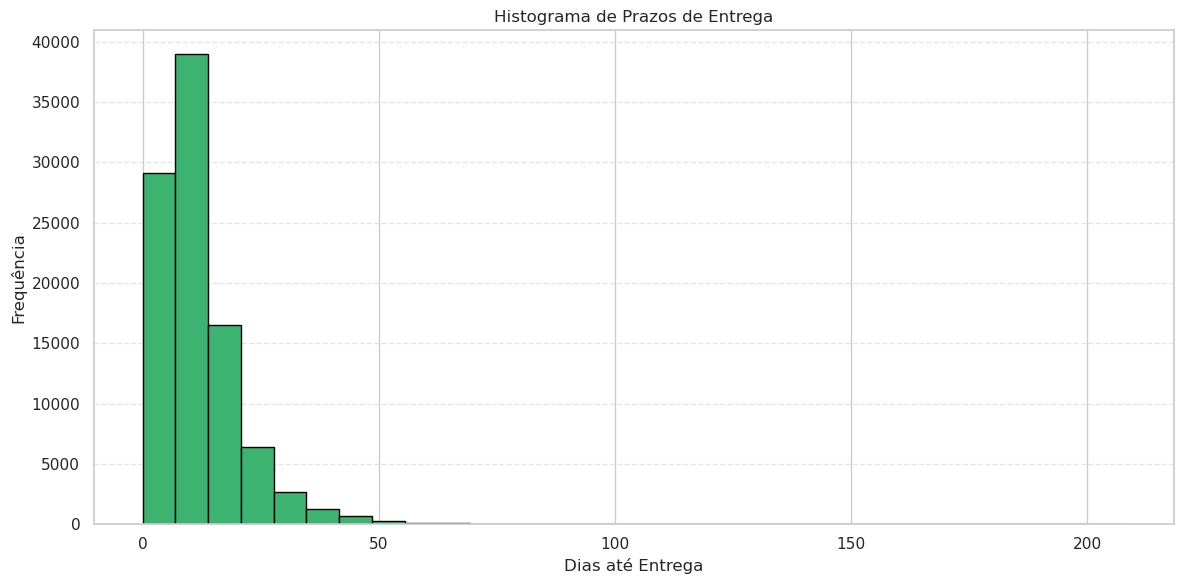

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(dfb_nn['dias_ate_entrega'], bins=30, color='mediumseagreen', edgecolor='black')
plt.xlabel('Dias até Entrega')
plt.ylabel('Frequência')
plt.title('Histograma de Prazos de Entrega')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Minha querry no pandas assim como no exercício passado foi feita baseada na minha query sql.

1. defini o dfb
2. Reatribui o dfb, para outro dataset sem os valores nulos nas colunas de interesse.
3. Criei a coluna 'dias_ate_entrega', que utlizado o método .dt.days para extrair o dia da subtração das datas.
4. Filtrei os dias de entrega maiores ou iguais a zero.
5. Fiz a query panda pelo agrupamento dos dias de entrega, ordenado pelos total dos pedidos assim como na query sql.

Utilizei somente 30 linhas na head, para ficar igual a ultima query do sql, mas claramente, caso só visualizamos o dataframe sem limitações iria ser igual ao da primeira query SQL, porem para não extender o notebook com o mesmo resultado optei por só deixar as 30 primeiras linhas.

## Insight b

Podemos afimar que grande parte das nossa entregas é feita em até duas semanas a partir da confirmação do pagamento, podendo demorar mais, porém em até 30 dias nós temos uma ótima taxa de entrega.

# c) Qual a relação entre o valor do frete e a distância de entrega?

Para ser honesto, não sei se todos os exercícios precisam ser resolvidos em python e sql, ou se é para utilizar a melhor ferramenta para cada situação, porém nesse caso utilizarei somente o pandas, pois existem muitos dados e eu quero que fique visivel a correlaçao dada.

In [160]:
%%sql

WITH geo_coordenadas AS (
    SELECT
        geolocation_zip_code_prefix,
        AVG(geolocation_lat) AS lat,
        AVG(geolocation_lng) AS lng
    FROM olist_geolocation_dataset
    GROUP BY geolocation_zip_code_prefix
),
cliente_coordenadas AS (
    SELECT
        cli.customer_id,
        geo.lat AS customer_lat,
        geo.lng AS customer_lng
    FROM olist_customers_dataset cli
    JOIN geo_coordenadas geo
    ON cli.customer_zip_code_prefix = geo.geolocation_zip_code_prefix
),
vendedor_coordenadas AS (
    SELECT
        vend.seller_id,
        geo.lat AS seller_lat,
        geo.lng AS seller_lng
    FROM olist_sellers_dataset vend
    JOIN geo_coordenadas geo ON vend.seller_zip_code_prefix = geo.geolocation_zip_code_prefix
),
frete_com_distancia AS (
    SELECT
        oi.order_id,
        oi.freight_value,
        6371 * 2 * ASIN(SQRT(
            POWER(SIN(RADIANS(cc.customer_lat - sc.seller_lat) / 2), 2) +
            COS(RADIANS(sc.seller_lat)) * COS(RADIANS(cc.customer_lat)) *
            POWER(SIN(RADIANS(cc.customer_lng - sc.seller_lng) / 2), 2)
        )) AS distancia_km
    FROM olist_order_items_dataset oi
    JOIN olist_orders_dataset o ON oi.order_id = o.order_id
    JOIN cliente_coordenadas cc ON o.customer_id = cc.customer_id
    JOIN vendedor_coordenadas sc ON oi.seller_id = sc.seller_id
    WHERE oi.freight_value IS NOT NULL
)

SELECT 
    FLOOR(distancia_km / 100) * 100 AS faixa_distancia_km,
    AVG(freight_value) AS media_frete,
    COUNT(*) AS total_pedidos
FROM frete_com_distancia
WHERE distancia_km IS NOT NULL
GROUP BY faixa_distancia_km
ORDER BY faixa_distancia_km


 * sqlite:///olist_dataset.db
Done.


faixa_distancia_km,media_frete,total_pedidos
0,11.757457602896341,20992
100,15.086909044520985,7839
200,17.738878697842658,7741
300,19.233853331663326,15968
400,19.908209614404623,11774
500,19.726619595915707,9206
600,21.58151177422254,5563
700,22.12764135099832,5359
800,21.18396746299282,6823
900,22.81165919282511,3122


### Explicar a query

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acessando os dataframes
geo_df = dataframes['olist_geolocation_dataset']
customers_df = dataframes['olist_customers_dataset']
sellers_df = dataframes['olist_sellers_dataset']
order_items_df = dataframes['olist_order_items_dataset']
orders_df = dataframes['olist_orders_dataset']

# 1. Calcular coordenadas médias por CEP
geo_coordenadas = geo_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()
geo_coordenadas.columns = ['geolocation_zip_code_prefix', 'lat', 'lng']

# 2. Coordenadas dos clientes
cliente_coordenadas = pd.merge(
    customers_df,
    geo_coordenadas,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)[['customer_id', 'lat', 'lng']]
cliente_coordenadas.columns = ['customer_id', 'customer_lat', 'customer_lng']

# 3. Coordenadas dos vendedores
vendedor_coordenadas = pd.merge(
    sellers_df,
    geo_coordenadas,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)[['seller_id', 'lat', 'lng']]
vendedor_coordenadas.columns = ['seller_id', 'seller_lat', 'seller_lng']

# 4. Calcular distância e frete
# Primeiro juntar todos os dados necessários
merged_data = pd.merge(
    order_items_df,
    orders_df,
    on='order_id',
    how='inner'
).merge(
    cliente_coordenadas,
    on='customer_id',
    how='inner'
).merge(
    vendedor_coordenadas,
    on='seller_id',
    how='inner'
)

# Remover registros sem valor de frete
merged_data = merged_data[merged_data['freight_value'].notna()]

# Função para calcular distância em km usando fórmula haversine
def calcular_distancia(row):
    lat1, lon1 = row['seller_lat'], row['seller_lng']
    lat2, lon2 = row['customer_lat'], row['customer_lng']
    
    # Converter graus para radianos
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Fórmula haversine
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6371 * c  # Raio da Terra em km
    return km

# Aplicar a função para calcular distância
merged_data['distancia_km'] = merged_data.apply(calcular_distancia, axis=1)

# Remover registros sem distância calculada
merged_data = merged_data[merged_data['distancia_km'].notna()]

# 5. Agrupar por faixa de distância e calcular estatísticas
merged_data['faixa_distancia_km'] = (merged_data['distancia_km'] // 100) * 100
resultado = merged_data.groupby('faixa_distancia_km').agg({
    'freight_value': 'mean',
    'order_id': 'count'
}).reset_index()
resultado.columns = ['faixa_distancia_km', 'media_frete', 'total_pedidos']

# Ordenar por faixa de distância
resultado = resultado.sort_values('faixa_distancia_km')

# Visualização dos resultados
resultado

,faixa_distancia_km,media_frete,total_pedidos
0,0.0,11.757458,20992
1,100.0,15.086909,7839
2,200.0,17.738879,7741
3,300.0,19.233853,15968
4,400.0,19.908210,11774
5,500.0,19.726620,9206
6,600.0,21.581512,5563
7,700.0,22.127641,5359
8,800.0,21.183967,6823
9,900.0,22.811659,3122


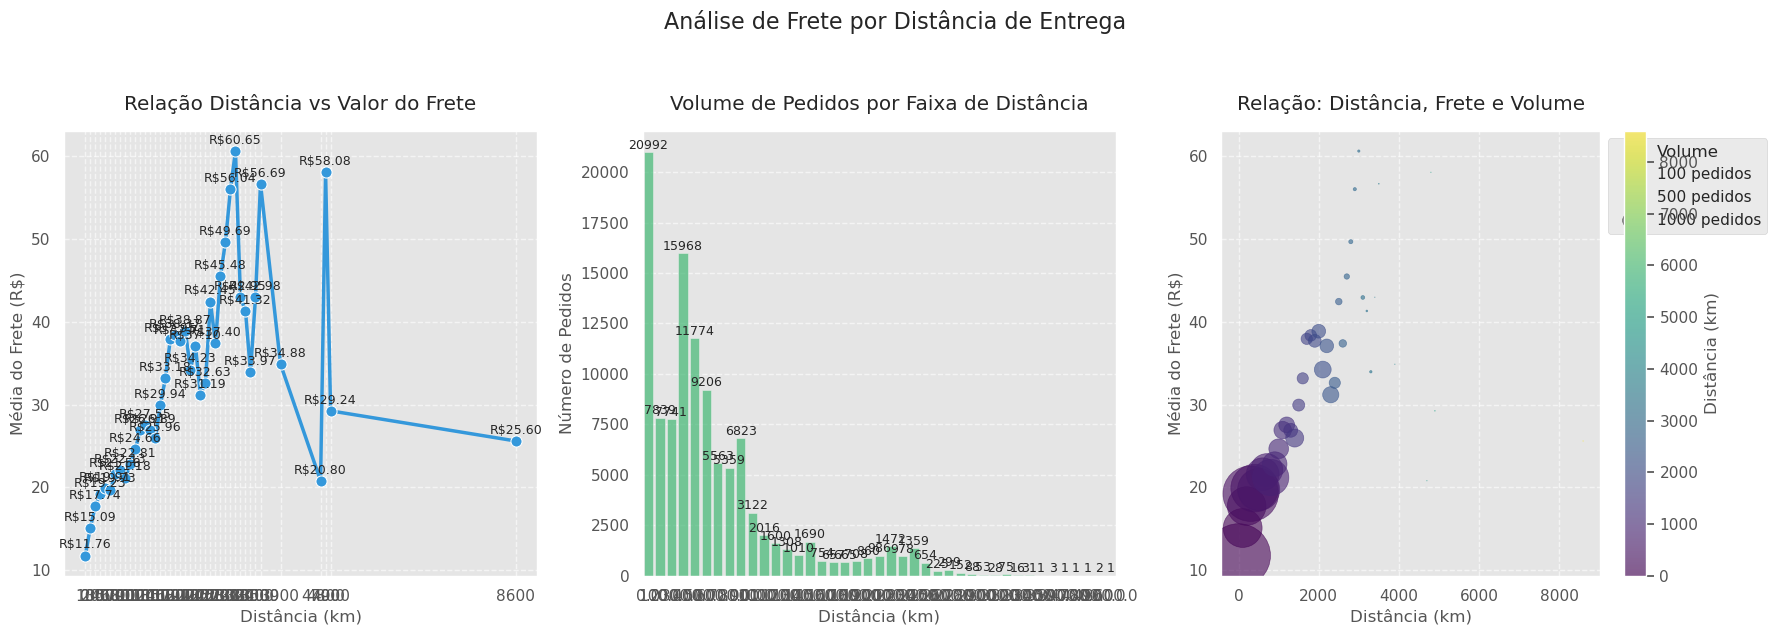

In [162]:
# Configuração do estilo
plt.style.use('ggplot')
sns.set_palette("husl")

# Acessando os dataframes (mesmo processamento anterior)
geo_df = dataframes['olist_geolocation_dataset']
customers_df = dataframes['olist_customers_dataset']
sellers_df = dataframes['olist_sellers_dataset']
order_items_df = dataframes['olist_order_items_dataset']
orders_df = dataframes['olist_orders_dataset']

# [Todo o processamento anterior permanece igual até a criação do dataframe 'resultado']

# Criando figura com subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Análise de Frete por Distância de Entrega', fontsize=16, y=1.05)

# Gráfico 1: Média de frete por distância (linha + pontos)
sns.lineplot(data=resultado, x='faixa_distancia_km', y='media_frete', 
             marker='o', markersize=8, linewidth=2.5, ax=ax1, color='#3498db')
ax1.set_title('Relação Distância vs Valor do Frete', pad=15)
ax1.set_xlabel('Distância (km)')
ax1.set_ylabel('Média do Frete (R$)')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xticks(resultado['faixa_distancia_km'].unique())

# Adicionar rótulos de dados
for idx, row in resultado.iterrows():
    ax1.text(row['faixa_distancia_km'], row['media_frete']+0.5, 
             f'R${row["media_frete"]:.2f}', 
             ha='center', va='bottom', fontsize=9)

# Gráfico 2: Volume de pedidos por distância (barras)
barplot = sns.barplot(data=resultado, x='faixa_distancia_km', y='total_pedidos', 
                      ax=ax2, alpha=0.7, color='#2ecc71')
ax2.set_title('Volume de Pedidos por Faixa de Distância', pad=15)
ax2.set_xlabel('Distância (km)')
ax2.set_ylabel('Número de Pedidos')
ax2.grid(True, linestyle='--', alpha=0.6, axis='y')

# Adicionar rótulos nas barras
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=9)

# Gráfico 3: Dispersão com tamanho proporcional ao volume
scatter = ax3.scatter(resultado['faixa_distancia_km'], resultado['media_frete'],
                     s=resultado['total_pedidos']/10, alpha=0.6,
                     c=resultado['faixa_distancia_km'], cmap='viridis')

ax3.set_title('Relação: Distância, Frete e Volume', pad=15)
ax3.set_xlabel('Distância (km)')
ax3.set_ylabel('Média do Frete (R$)')
ax3.grid(True, linestyle='--', alpha=0.6)

# Adicionar barra de cores para distância
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Distância (km)')

# Adicionar legenda para tamanho dos pontos
for size in [100, 500, 1000]:
    ax3.scatter([], [], c='k', alpha=0.5, s=size/10,
               label=f'{size} pedidos')
ax3.legend(title='Volume', loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

#### Insight c)

Temos uma relação de crescimento do valor do fréte conforme a distância de entrega.

Além disso, também podemos observar que conforme o a distância cresce, o número de pedidos diminui, ou seja, nós temos que as pessoas usualmente compram de vendedores próximos.


# d) Quais são as categorias de produtos mais vendidas em termos de faturamento?




In [163]:
%%sql

SELECT
    products.product_category_name as categoria,
    round(sum(items.price), 2) as faturamento
FROM
    olist_order_items_dataset as items
    left join
    olist_products_dataset as products
    on items.product_id = products.product_id
GROUP BY 
    categoria
ORDER BY
    faturamento DESC
limit 10

 * sqlite:///olist_dataset.db
Done.


categoria,faturamento
beleza_saude,1258681.34
relogios_presentes,1205005.68
cama_mesa_banho,1036988.68
esporte_lazer,988048.97
informatica_acessorios,911954.32
moveis_decoracao,729762.49
cool_stuff,635290.85
utilidades_domesticas,632248.66
automotivo,592720.11
ferramentas_jardim,485256.46


#### pandas

In [164]:

# Acessar os DataFrames
items = dataframes['olist_order_items_dataset']
products = dataframes['olist_products_dataset']

# Merge (left join)
merged = items.merge(products, on='product_id', how='left')

# Agrupar por categoria e somar o faturamento
faturamento_por_categoria = (
    merged.groupby('product_category_name')['price']
    .sum()
    .round(2)
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'product_category_name': 'categoria', 'price': 'faturamento'})
)


/tmp/ipykernel_74684/3673836793.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


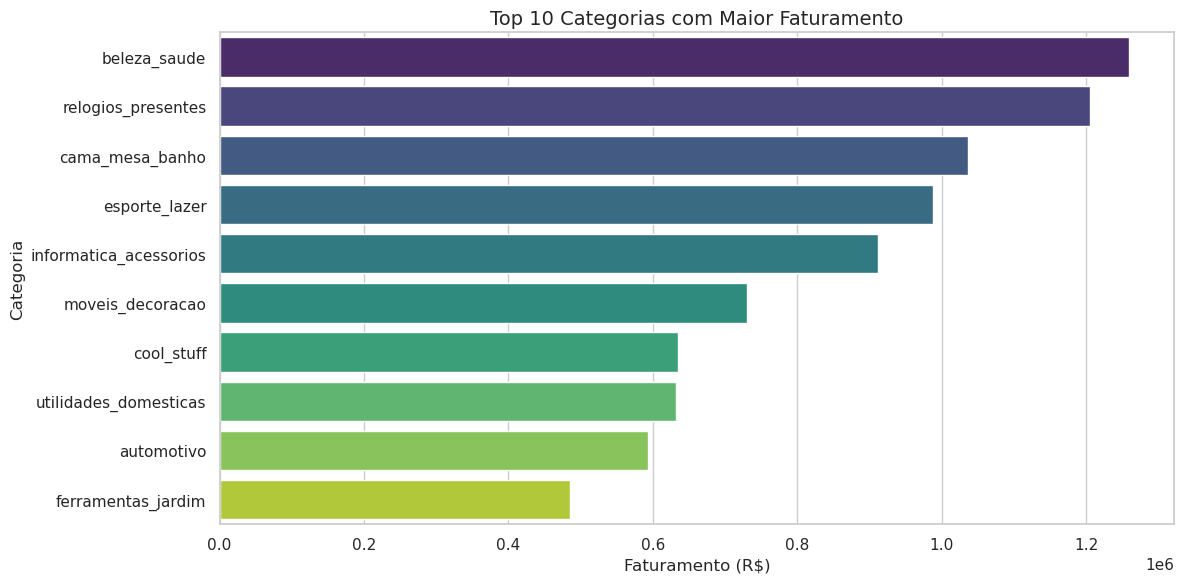

In [165]:
# Ajustar o estilo
sns.set(style="whitegrid")

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=faturamento_por_categoria,
    x='faturamento',
    y='categoria',
    palette='viridis'
)

plt.title('Top 10 Categorias com Maior Faturamento', fontsize=14)
plt.xlabel('Faturamento (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.tight_layout()
plt.show()


### Insight D

Temos que os produtos que mais geram renda são os de beleza e saudo, junto com relogios e presentes.

# e) Quais estados brasileiros possuem o maior valor médio de pedido?



#### SQL

In [166]:
%%sql

SELECT
    c.customer_state AS estado,
    ROUND(SUM(oi.price) / COUNT(DISTINCT o.order_id), 2) AS valor_medio_pedido
FROM
    olist_orders_dataset AS o
JOIN
    olist_customers_dataset AS c
    ON o.customer_id = c.customer_id
JOIN
    olist_order_items_dataset AS oi
    ON o.order_id = oi.order_id
GROUP BY
    estado
ORDER BY
    valor_medio_pedido DESC

 * sqlite:///olist_dataset.db
Done.


estado,valor_medio_pedido
PB,216.67
AP,198.15
AC,197.32
AL,195.41
RO,186.8
PA,184.48
TO,177.86
PI,176.3
MT,173.26
RN,172.27


#### Quero fazer um adendo aqui porque fiz uma query anterior e achei interessante

In [167]:
%%sql
SELECT
    cli.customer_state AS estado,
    COUNT(*) AS numero_de_pedidos
FROM
    olist_customers_dataset AS cli
LEFT JOIN
    olist_orders_dataset AS ped
    ON cli.customer_id = ped.customer_id
GROUP BY
    estado
ORDER BY
    numero_de_pedidos DESC

limit 5


 * sqlite:///olist_dataset.db
Done.


estado,numero_de_pedidos
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


Tinha feito essa query antes para ver o número de pedidos, e achei interesasnte que mesmo são paulo sendo o estado que mais vende ele é o último colocado em valor medio por produto, faz sentido, porque existem muito mais compras dado que compras pequenas puxam a média para baixo, mas não esperava que seria o último estado. Achei o insight interessante.

### pandas

In [168]:
# Acessar os dataframes
orders = dataframes['olist_orders_dataset']
customers = dataframes['olist_customers_dataset']
order_items = dataframes['olist_order_items_dataset']

# Merge dos dataframes
merged = orders.merge(customers, on='customer_id') \
               .merge(order_items, on='order_id')

# Agrupar por estado e order_id para somar os preços por pedido
pedido_por_estado = (
    merged.groupby(['customer_state', 'order_id'])['price'].sum().reset_index()
)

# Agora agrupar por estado para calcular a média dos valores dos pedidos
resultado = (
    pedido_por_estado.groupby('customer_state')['price']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'customer_state': 'estado', 'price': 'valor_medio_pedido'})
    .sort_values(by='valor_medio_pedido', ascending=False)
)

resultado


,estado,valor_medio_pedido
14,PB,216.67
3,AP,198.15
0,AC,197.32
1,AL,195.41
20,RO,186.80
13,PA,184.48
26,TO,177.86
16,PI,176.30
12,MT,173.26
19,RN,172.27


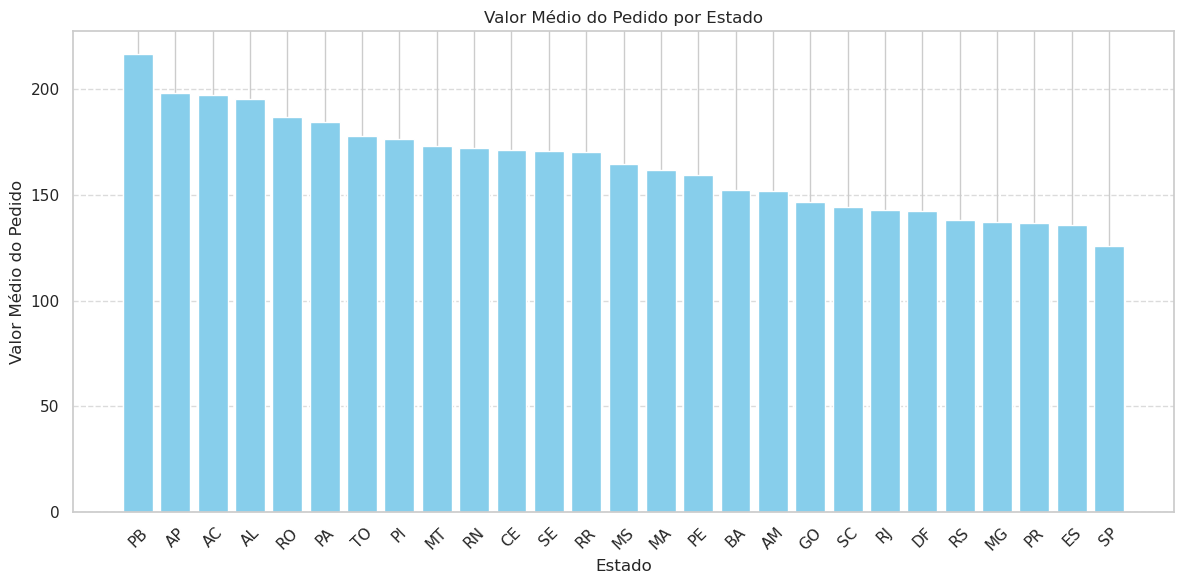

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Acessar os dataframes
orders = dataframes['olist_orders_dataset']
customers = dataframes['olist_customers_dataset']
order_items = dataframes['olist_order_items_dataset']

# Merge dos dataframes
merged = orders.merge(customers, on='customer_id') \
               .merge(order_items, on='order_id')

# Agrupar por estado e order_id para somar os preços por pedido
pedido_por_estado = (
    merged.groupby(['customer_state', 'order_id'])['price'].sum().reset_index()
)

# Agora agrupar por estado para calcular a média dos valores dos pedidos
resultado = (
    pedido_por_estado.groupby('customer_state')['price']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'customer_state': 'estado', 'price': 'valor_medio_pedido'})
    .sort_values(by='valor_medio_pedido', ascending=False)
)

# Plotar gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(resultado['estado'], resultado['valor_medio_pedido'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Valor Médio do Pedido')
plt.title('Valor Médio do Pedido por Estado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Solução de Problemas de Negócio (25 pontos)

# 1.Análise de Retenção: Calcule a taxa de clientes recorrentes. Considere um cliente recorrente aquele que fez mais de um pedido no período analisado. Quais insights podemos extrair destes dados? 

In [170]:
# ANÁLISE DE RETENÇÃO DE CLIENTES - CÓDIGO COMPLETO

import pandas as pd

# 1. CARREGAR OS DATAFRAMES NECESSÁRIOS
orders_df = dataframes['olist_orders_dataset']
customers_df = dataframes['olist_customers_dataset']  # Contém o customer_unique_id

# 2. VERIFICAÇÃO INICIAL DOS DADOS
print("\n=== VERIFICAÇÃO INICIAL ===")
print(f"Total de pedidos: {len(orders_df)}")
print(f"Clientes únicos (customer_id): {orders_df['customer_id'].nunique()}")
print(f"Pedidos por cliente (média): {len(orders_df)/orders_df['customer_id'].nunique():.2f}")

# 3. JUNTAR COM INFORMAÇÕES DE CLIENTES UNICOS
merged_df = orders_df.merge(customers_df[['customer_id', 'customer_unique_id']], on='customer_id')

# 4. ANÁLISE DE RETENÇÃO POR CLIENTE ÚNICO
print("\n=== ANÁLISE DE RETENÇÃO ===")
customer_orders = merged_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_orders.columns = ['customer_unique_id', 'order_count']

# Classificar clientes como recorrentes ou não
customer_orders['is_recurrent'] = customer_orders['order_count'] > 1

# Calcular métricas de retenção
total_customers = len(customer_orders)
recurrent_customers = customer_orders['is_recurrent'].sum()
retention_rate = recurrent_customers / total_customers * 100

# 5. RESULTADOS
print(f"Taxa de retenção (clientes recorrentes): {retention_rate:.2f}%")
print(f"Total de clientes únicos: {total_customers}")
print(f"Clientes recorrentes: {recurrent_customers}")
print(f"Clientes com apenas 1 pedido: {total_customers - recurrent_customers}")

# 6. DISTRIBUIÇÃO DE PEDIDOS POR CLIENTE
print("\n=== DISTRIBUIÇÃO DE PEDIDOS ===")
order_distribution = customer_orders['order_count'].value_counts().sort_index()
print(order_distribution)



=== VERIFICAÇÃO INICIAL ===
Total de pedidos: 99281
Clientes únicos (customer_id): 99281
Pedidos por cliente (média): 1.00

=== ANÁLISE DE RETENÇÃO ===
Taxa de retenção (clientes recorrentes): 3.07%
Total de clientes únicos: 95997
Clientes recorrentes: 2948
Clientes com apenas 1 pedido: 93049

=== DISTRIBUIÇÃO DE PEDIDOS ===
order_count
1     93049
2      2708
3       191
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64


# Insight problema de negócio

Como podemos observar acima, temos muitos clientes e pedidos, porém a recorrência é baixa, ou seja, normalmente nossos clientes só compram uma única vez e não compram mais, o que é de certa forma estranho dado o número de dados que temos. Dessa forma, podemos fazer campanhas de Marketing para melhorar nossa retêncão de clientes, para dessa forma clientes que ja compraram conosco comprarem novamente.

# Predição de Atraso: Crie um modelo simples para prever se um pedido será entregue com atraso.


#### Vou quebrar esse problema em alguns blocos de código

## Definir o atraso

Para definir o atraso terei que comparar as colunas delivered_customer_date com estimated_delivery_date. Na Limpeza dos dados eu optei por não excluir os dados, porém como estamos tratando com um modelo de predição, ter dados nulos seria razoavelmente impactante, assim vou tratar esses dados nulos em um novo dataset, simplesmente excluindo eles, no geral os dados só representam cerca de 3% do conjunto de dados, então não será um problema tão grande fazer isso.

In [171]:
df_previsao = dataframes['olist_orders_dataset']

print(df_previsao.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
enviados                            0
entregues                           0
mes                                 0
dtype: int64


In [172]:
df_previsao = df_previsao.dropna(subset=['order_delivered_carrier_date', 'order_delivered_customer_date'])

In [173]:
df_previsao.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
enviados                         0
entregues                        0
mes                              0
dtype: int64

Agora podemos começar a definir os atrasos, dado que não temos mais dados nulos para serem comparados.

In [174]:
df_previsao['Atrasado'] = (df_previsao['order_delivered_carrier_date'] > df_previsao['order_estimated_delivery_date']).astype(int)

/tmp/ipykernel_74684/4015680055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previsao['Atrasado'] = (df_previsao['order_delivered_carrier_date'] > df_previsao['order_estimated_delivery_date']).astype(int)


In [175]:
print(df_previsao['Atrasado'].value_counts())
print(f'\nProporção:\n{df_previsao['Atrasado'].value_counts(normalize=True)}')

Atrasado
0    95996
1      465
Name: count, dtype: int64

Proporção:
Atrasado
0    0.995179
1    0.004821
Name: proportion, dtype: float64


No nosso dataset, temos que 465 produtos foram entregados com atraso, enquanto 95996 foram entregados no prazo. Uma proporção de 99.52% para 0.48%

## Features do modelo

In [176]:
df_previsao['tempo_entrega'] = (df_previsao['order_delivered_customer_date'] - df_previsao['order_purchase_timestamp']).dt.days
df_previsao['tempos_estimado'] = (df_previsao['order_estimated_delivery_date'] - df_previsao['order_purchase_timestamp']).dt.days

/tmp/ipykernel_74684/4036768297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previsao['tempo_entrega'] = (df_previsao['order_delivered_customer_date'] - df_previsao['order_purchase_timestamp']).dt.days
/tmp/ipykernel_74684/4036768297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previsao['tempos_estimado'] = (df_previsao['order_estimated_delivery_date'] - df_previsao['order_purchase_timestamp']).dt.days


Vou usar a estimativa_rapida como 7, pois foi o tempo com mais pedidos na analise exploratoria

In [177]:
df_previsao['estimativa_rapida'] = (df_previsao['tempos_estimado'] < 7).astype(int) 

/tmp/ipykernel_74684/545958902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previsao['estimativa_rapida'] = (df_previsao['tempos_estimado'] < 7).astype(int)


vou fazer um merge nos datasets para poder ter a categoria de produtos no df_previsao

In [178]:
df_items = dataframes['olist_order_items_dataset']
df_products = dataframes['olist_products_dataset']

df_previsao = df_previsao.merge(df_items[['order_id', 'product_id']], on='order_id', how='left')
df_previsao = df_previsao.merge(df_products[['product_id', 'product_category_name']], on='product_id', how='left')

In [179]:
# Todas as colunas do dataset de previsao
df_previsao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   enviados                       110180 non-null  int64         
 9   entregues                      110180 non-null  int64         
 10  mes                            110180 non-null  int32         
 11  

## Preparação dos Dados

In [180]:
df_previsao.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
enviados                            0
entregues                           0
mes                                 0
Atrasado                            0
tempo_entrega                       0
tempos_estimado                     0
estimativa_rapida                   0
product_id                          0
product_category_name            1537
dtype: int64

Temos algmas categorias de produtos com nomes nulos,vou substituir por uma flag.

In [181]:
df_previsao['product_category_name'] = df_previsao['product_category_name'].fillna('desconhecido')

In [182]:
df_previsao.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
enviados                         0
entregues                        0
mes                              0
Atrasado                         0
tempo_entrega                    0
tempos_estimado                  0
estimativa_rapida                0
product_id                       0
product_category_name            0
dtype: int64

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [184]:
# Enconding pela categoria do produto
le = LabelEncoder()
df_previsao['product_category_encoded'] = le.fit_transform(df_previsao['product_category_name']) 

In [185]:
# ultimas features
features = ['tempo_entrega', 'tempos_estimado', 'estimativa_rapida', 'product_category_encoded']
X = df_previsao[features]
y = df_previsao['Atrasado']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Vou treinar o Modelo


In [187]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsoes
y_pred = model.predict(X_test)

In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.994826647304411
Precision: 0.44776119402985076
Recall: 0.2803738317757009
F1 Score: 0.3448275862068966


### Resultados
1. A acuracia do modelo esta alta, dizendo que o modelo acertou 99.48% das previsões
2. O modelo apresenta uma precisão não tão alta, pois quando o modelo prevê que um pedido vai atrasar ele acerta 45% da vezes.
3. O modelo conseguiu identificar apenas 28% dos pedidos que de fato atrasaram, o que acaba sendo preocupante caso tivessemos um numero grande de atrasos.
4. O F1 score, esta realmente muito abaixo do esperado para um modelo de previsão, refletindo a dificuldade do modelo em lidar com os pedidos em atraso.

O que podemos tirar desse modelo é que, temos dados majoritariamente entregues no prazo ideal, literalmente mais de 99% dos pedidos foram entregues sem atraso, os pedidos que foram entregues fora do prazo podem até ser considerados outliers como vou demonstar no boxplot abaixo, dito isso, o modelo não é tão robusto para fazer a previsão dos atrasados, porém a parcela desses dados é bem baixa.

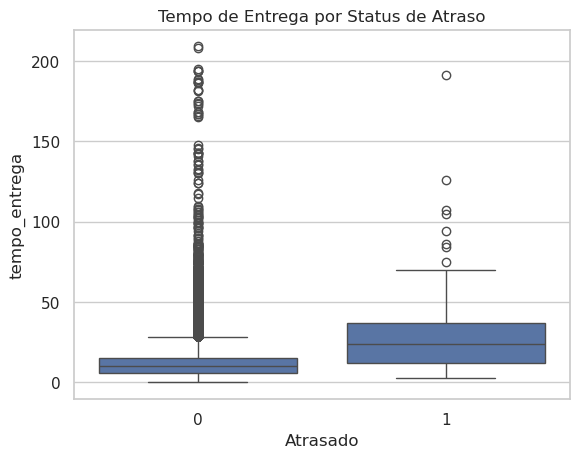

In [189]:
sns.boxplot(data=df_previsao, x='Atrasado', y='tempo_entrega')
plt.title('Tempo de Entrega por Status de Atraso')
plt.show()

# 3. Segmentação de Clientes: Utilize técnicas de clustering para segmentar os clientes em grupos. Analise o comportamento de cada grupo e sugira estratégias de marketing específicas para cada um.

## Preparação e agregação dos dados

In [190]:
#clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set(style="whitegrid")

In [191]:
# Separei o dataframes em partes, porque vou fazer um merge e vai ficar mais legivel.
cli = dataframes['olist_customers_dataset']
ped = dataframes['olist_orders_dataset']
items = dataframes['olist_order_items_dataset']
pagamentos = dataframes['olist_order_payments_dataset']
reviews = dataframes['olist_order_reviews_dataset']

In [192]:
# Merge pedido e cliente
df3 = pd.merge(ped, cli, on='customer_id')

# df3 com items
df3 = pd.merge(df3, items, on='order_id')

# df3 com pagamentos
df3 = pd.merge(df3, pagamentos, on='order_id')

# df3 com reviews
df3 = pd.merge(df3, reviews[['order_id', 'review_score']], on='order_id', how='left')

Na célula acima basicamente fui fazendo merge com as tabelas para juntar as informações relevantes

In [193]:
# Criacao de coluna
df3['tempo_entrega'] = (df3['order_delivered_customer_date'] - df3['order_purchase_timestamp']).dt.days

In [194]:
df3.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,enviados,entregues,...,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,tempo_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,1,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,4.0,8.0


## Criação de Features

In [195]:
df_clientes = df3.groupby('customer_id').agg({
    'order_id': 'nunique',                                # número de pedidos
    'payment_value': 'sum',                               # total gasto
    'price': 'mean',                                      # ticket médio (preço médio dos produtos)
    'review_score': 'mean',                               # média das avaliações
    'tempo_entrega': 'mean'                               # tempo médio de entrega
}).reset_index()

df_clientes.columns = ['customer_id', 'qtd_pedidos', 'valor_total', 'ticket_medio', 'avaliacao_media', 'tempo_medio_entrega']

## Pré-processamento dos dados

In [196]:
print(df_clientes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98651 entries, 0 to 98650
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          98651 non-null  object 
 1   qtd_pedidos          98651 non-null  int64  
 2   valor_total          98651 non-null  float64
 3   ticket_medio         98651 non-null  float64
 4   avaliacao_media      97902 non-null  float64
 5   tempo_medio_entrega  96461 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.5+ MB
None


In [197]:
print(df_clientes.isnull().sum())

customer_id               0
qtd_pedidos               0
valor_total               0
ticket_medio              0
avaliacao_media         749
tempo_medio_entrega    2190
dtype: int64


Temos poucos dados nulos, por isso vou fazer e exclusão direta deles.

In [198]:
df_clientes = df_clientes.dropna()

In [199]:
# Normalizacao dos dados
features = ['qtd_pedidos', 'valor_total', 'ticket_medio', 'avaliacao_media', 'tempo_medio_entrega']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clientes[features])

## Elbow Method

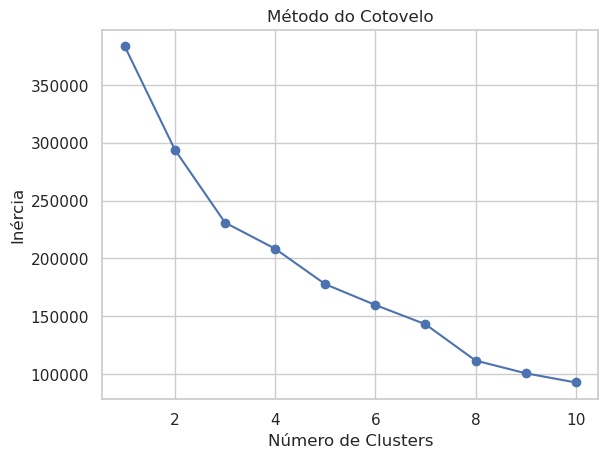

In [200]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [201]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_clientes['cluster'] = kmeans.fit_predict(X_scaled)


In [202]:
cluster_summary = df_clientes.groupby('cluster')[features].mean().round(2)
display(cluster_summary)

,qtd_pedidos,valor_total,ticket_medio,avaliacao_media,tempo_medio_entrega
cluster,,,,,
0,1.0,149.15,97.75,4.66,7.59
1,1.0,234.54,108.78,1.24,19.73
2,1.0,1822.02,1016.29,4.16,13.08
3,1.0,182.92,120.58,4.36,20.26


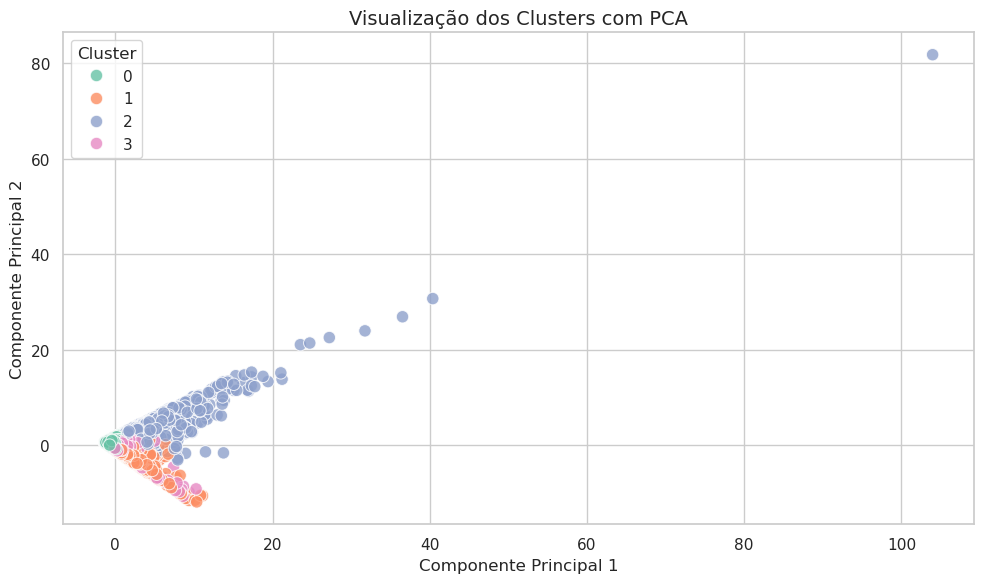

In [203]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Aplica PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Adiciona os componentes ao DataFrame
df_clientes['pca1'] = pca_components[:, 0]
df_clientes['pca2'] = pca_components[:, 1]

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clientes,
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title('Visualização dos Clusters com PCA', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


Explicar aqui depois os cluster, esta desenvolvido no obsdian so reler e editar melhor.

# 4. Análise de Satisfação: Explore a relação entre a nota de avaliação dos clientes e diferentes aspectos como categoria do produto, tempo de entrega, valor do pedido, etc. Identifique fatores que mais impactam na satisfação do cliente.

## Preparação dos Dados

In [204]:
produtos = dataframes['olist_products_dataset']
nome_prod = dataframes['product_category_name_translation']
vendedor = dataframes['olist_sellers_dataset']

In [205]:
# Vou fazer um merge dos dados novamente, utilizando os dataset anteriomente definidos
df4 = pd.merge(reviews, ped, on='order_id', how='left')
df4 = pd.merge(df4, pagamentos, on='order_id', how='left')
df4 = pd.merge(df4, items, on='order_id', how='left')
df4 = pd.merge(df4, produtos, on='product_id', how='left')
df4 = pd.merge(df4, nome_prod, on='product_category_name', how='left')
df4 = pd.merge(df4, vendedor, on='seller_id', how='left')

In [206]:
# Criacao de colunas para tempos de entrega
df4['tempo_entrega'] = (df4['order_delivered_customer_date'] - df4['order_purchase_timestamp']).dt.days
df4['estimativa_entrega'] = (df4['order_estimated_delivery_date'] - df4['order_purchase_timestamp']).dt.days
df4['atraso_entrega'] = df4['tempo_entrega'] - df4['estimativa_entrega']

In [207]:
# VAlor total preco e frete
df4['valor_total_pedido'] = df4['price'] + df4['freight_value']

## Análise por Categoria de produto

Top 10 categorias com melhores avaliações:
product_category_name_english
cds_dvds_musicals                        4.642857
fashion_childrens_clothes                4.500000
books_general_interest                   4.438503
books_imported                           4.419355
flowers                                  4.419355
costruction_tools_tools                  4.415842
books_technical                          4.375465
food_drink                               4.324138
small_appliances_home_oven_and_coffee    4.320513
luggage_accessories                      4.295945
Name: review_score, dtype: float64

Top 10 categorias com piores avaliações:
product_category_name_english
furniture_bedroom                    3.841270
audio                                3.840849
furniture_mattress_and_upholstery    3.804878
fashio_female_clothing               3.780000
fixed_telephony                      3.672862
home_comfort_2                       3.642857
fashion_male_clothing                3.54861

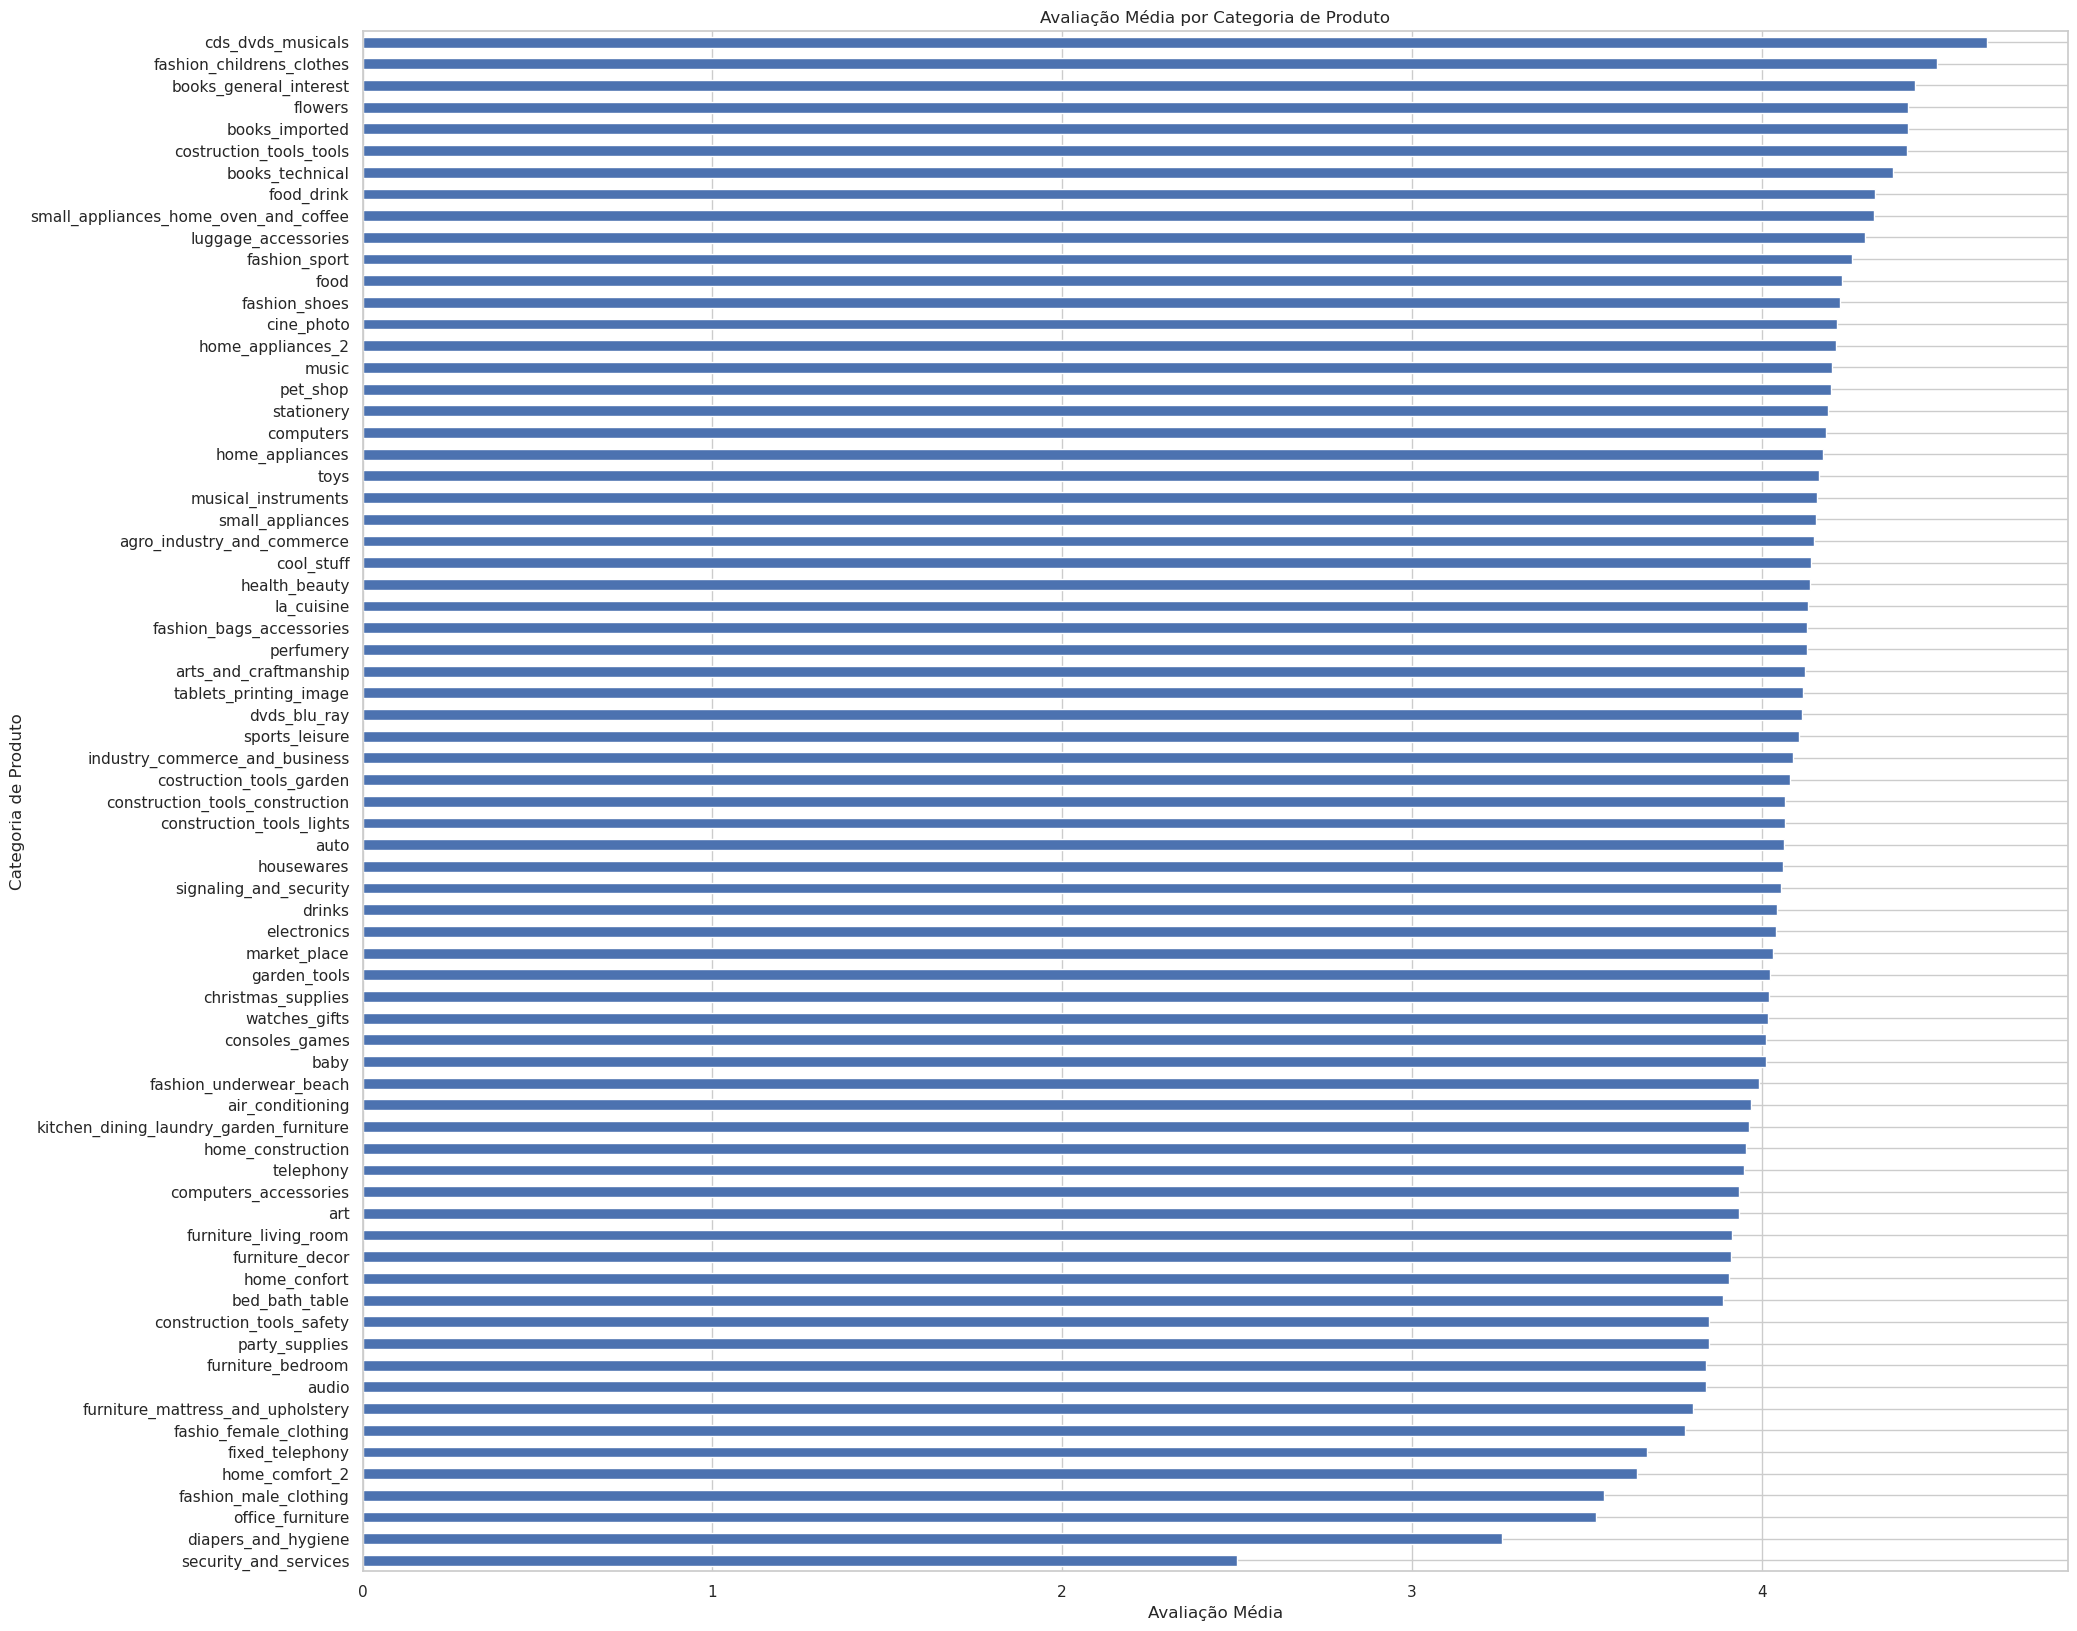

In [208]:
# Avaliação média por categoria de produto (em inglês)
review_categoria = df4.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)

# Top 10 melhores categorias
print("Top 10 categorias com melhores avaliações:")
print(review_categoria.head(10))

# Top 10 piores categorias
print("\nTop 10 categorias com piores avaliações:")
print(review_categoria.tail(10))

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 20))
review_categoria.sort_values().plot(kind='barh')
plt.title('Avaliação Média por Categoria de Produto')
plt.xlabel('Avaliação Média')
plt.ylabel('Categoria de Produto')
plt.show()

## Análise por Tempo de Entrega

Correlação entre tempo de entrega e avaliação: -0.3027567826448285
Correlação entre atraso na entrega e avaliação: -0.22847841222502543


/tmp/ipykernel_74684/411135487.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avaliacao_por_tempo = df4.groupby('faixa_tempo_entrega')['review_score'].mean()


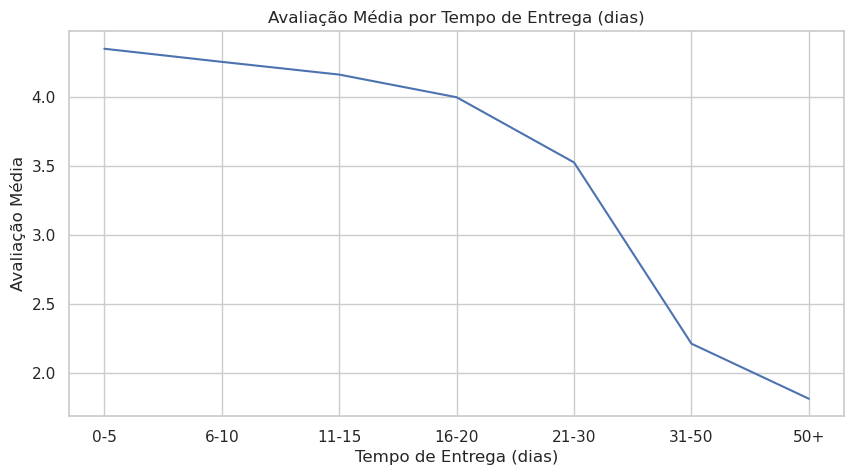

In [209]:
# Correlações
print("Correlação entre tempo de entrega e avaliação:", 
      df4['tempo_entrega'].corr(df4['review_score']))
print("Correlação entre atraso na entrega e avaliação:", 
      df4['atraso_entrega'].corr(df4['review_score']))

# Avaliação por faixa de tempo de entrega
df4['faixa_tempo_entrega'] = pd.cut(df4['tempo_entrega'], 
                                   bins=[0, 5, 10, 15, 20, 30, 50, 100],
                                   labels=['0-5', '6-10', '11-15', '16-20', '21-30', '31-50', '50+'])

avaliacao_por_tempo = df4.groupby('faixa_tempo_entrega')['review_score'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avaliacao_por_tempo.index, y=avaliacao_por_tempo.values)
plt.title('Avaliação Média por Tempo de Entrega (dias)')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Avaliação Média')
plt.show()

## Análise por Valor do Pedido


Correlação entre valor total do pedido e avaliação: -0.007406649176182689


/tmp/ipykernel_74684/2851571662.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avaliacao_por_valor = df4.groupby('faixa_valor_pedido')['review_score'].mean()


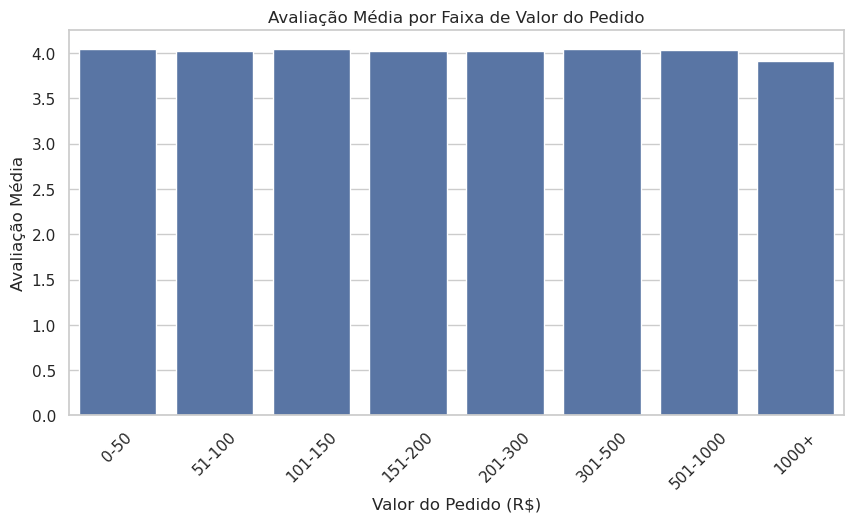

In [210]:
# Correlação
print("Correlação entre valor total do pedido e avaliação:", 
      df4['valor_total_pedido'].corr(df4['review_score']))

# Avaliação por faixa de valor
df4['faixa_valor_pedido'] = pd.cut(df4['valor_total_pedido'], 
                                  bins=[0, 50, 100, 150, 200, 300, 500, 1000, 5000],
                                  labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '501-1000', '1000+'])

avaliacao_por_valor = df4.groupby('faixa_valor_pedido')['review_score'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avaliacao_por_valor.index, y=avaliacao_por_valor.values)
plt.title('Avaliação Média por Faixa de Valor do Pedido')
plt.xlabel('Valor do Pedido (R$)')
plt.ylabel('Avaliação Média')
plt.xticks(rotation=45)
plt.show()

## 4. Análise por Método de Pagamento


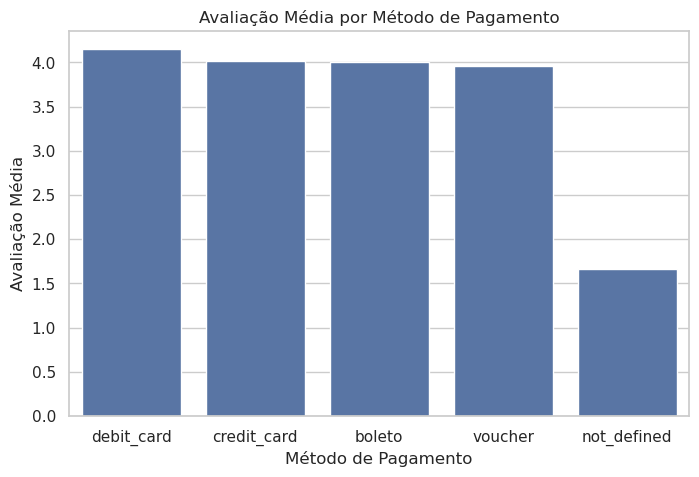

In [211]:
# Avaliação por tipo de pagamento
avaliacao_por_pagamento = df4.groupby('payment_type')['review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avaliacao_por_pagamento.index, y=avaliacao_por_pagamento.values)
plt.title('Avaliação Média por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Avaliação Média')
plt.show()

## 5. Análise por Estado do Vendedor


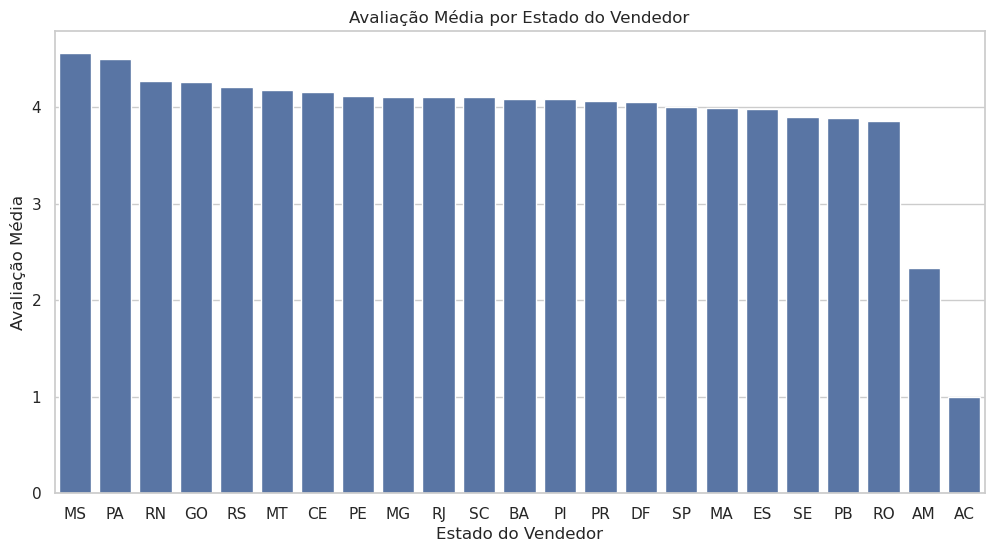

In [212]:
# Avaliação por estado do vendedor
avaliacao_por_estado = df4.groupby('seller_state')['review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avaliacao_por_estado.index, y=avaliacao_por_estado.values)
plt.title('Avaliação Média por Estado do Vendedor')
plt.xlabel('Estado do Vendedor')
plt.ylabel('Avaliação Média')
plt.show()